In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### no missing values found in the dataset

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### no outliers observed from instant, season, yr, month, holiday, working day, weathersit. (they are all within the allowed limits)
### have to check outliers for weekday, temp, atemp, hum, windspeed, 
check for total of counts is equal to casual + registered

In [6]:
df[df.cnt != (df.casual + df.registered)].shape

(0, 16)

counts is sum of casual and registered users. data is correct

In [7]:
df[df.cnt == (df.casual + df.registered)].shape

(730, 16)

sum of casual and registered is found tallied.

In [8]:
df.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

values of weekdays are found to be correct

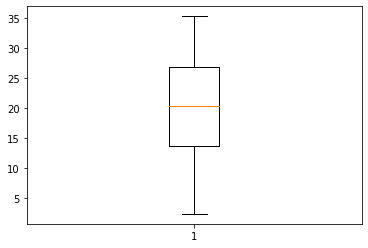

In [9]:
plt.boxplot(df.temp)
plt.show()

no outliers in temp field

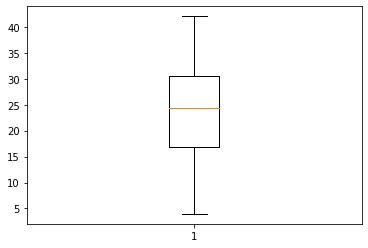

In [10]:
plt.boxplot(df.atemp)
plt.show()

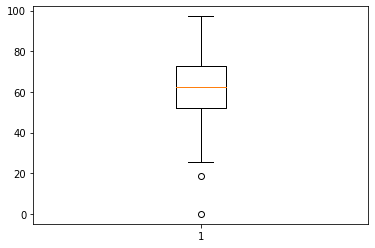

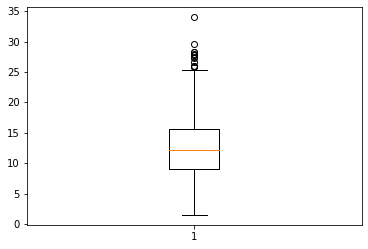

In [11]:
plt.boxplot(df.hum)
plt.show()
plt.boxplot(df.windspeed)
plt.show()

In [12]:
df[df.hum <21].shape

(2, 16)

In [13]:
df[df.windspeed > df.windspeed.quantile(q=0.95)].shape

(37, 16)

#### convert 'dteday into a day time format
#### converting date into day and month

In [14]:
df.dteday= pd.to_datetime(df.dteday)
df['weekday']=df.dteday.dt.day_name()
df['mnth']=df.dteday.dt.month_name()
df['day']=df.dteday.dt.day

In [15]:
df.shape

(730, 17)

changing categorical variables to understandable values

In [16]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [17]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

holiday column not required as working day column includes more usable data like weekends and holidays. Hence the column "holiday' is replaced the below data for plotting box plots and for better understanding of figures

In [18]:
df['season']=df['season'].replace([1,2,3,4], ['Spring', 'Summer', 'Fall','Winter'])
df['holiday']=df['workingday'].replace([0,1], ['Working Day','Holiday'])
df['weathersit']=df['weathersit'].replace([1,2,3,4], ['Clear', 'Misty', 'Light Snow/Rain','Heavy Snow/Rain'])




In [19]:
df=df.drop('instant', axis=1)
df=df.drop('dteday', axis=1)
df=df.drop('casual', axis=1)
df= df.drop('registered', axis=1)
#Casual and registered are dropped as their sum is equal to the target variable. including this as predictors can cause an erroneous model

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,Spring,0,January,Working Day,Monday,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,Spring,0,February,Working Day,Thursday,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,March,Holiday,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,Spring,0,April,Holiday,Sunday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,Spring,0,May,Holiday,Tuesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


In [20]:
print(df.season.value_counts())
print('\n')

print(df.mnth.value_counts())
print('\n')

print(df.holiday.value_counts())
print('\n')

print(df.weekday.value_counts())
print('\n')

print(df.weathersit.value_counts())

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64


March        62
December     62
July         62
January      62
October      62
May          62
August       62
September    60
April        60
November     60
June         60
February     56
Name: mnth, dtype: int64


Holiday        499
Working Day    231
Name: holiday, dtype: int64


Tuesday      105
Monday       105
Saturday     104
Friday       104
Wednesday    104
Sunday       104
Thursday     104
Name: weekday, dtype: int64


Clear              463
Misty              246
Light Snow/Rain     21
Name: weathersit, dtype: int64


## Visualising Numerical and Categorical Variables

In [21]:
dfnum=df[['temp','atemp','hum','windspeed','cnt']]

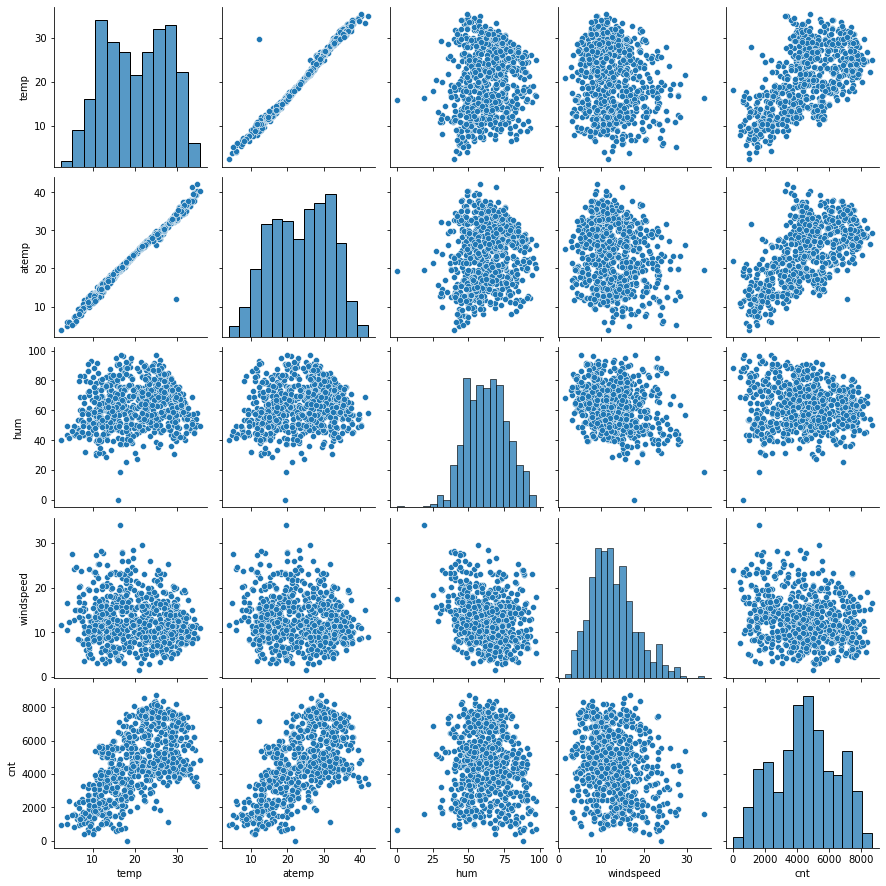

In [22]:

sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

In [23]:
df[['atemp','temp']].corr()

,atemp,temp
atemp,1.000000,0.991696
temp,0.991696,1.000000


a temp and temp are highly collinear. Hence we can use 'atemp' and drop 'temp'. as 'atemp'-feeling temperature will have more influence among users

In [24]:
df=df.drop('temp', axis=1)

In [25]:
df.holiday.value_counts()

Holiday        499
Working Day    231
Name: holiday, dtype: int64

plt.figure(figsize=(10,81))
plt.subplot(2,3,1)
sns.boxplot

### Observations


## Preparing the data

In [26]:
season_dummy= pd.get_dummies(df['season'], drop_first=True)
df=pd.concat([df, season_dummy], axis=1)
df=df.drop('season', axis=1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,Spring,Summer,Winter
0,0,January,Working Day,Monday,0,Misty,18.18125,80.5833,10.749882,985,1,1,0,0
1,0,February,Working Day,Thursday,0,Misty,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,March,Holiday,Thursday,1,Clear,9.47025,43.7273,16.636703,1349,1,1,0,0
3,0,April,Holiday,Sunday,1,Clear,10.60610,59.0435,10.739832,1562,1,1,0,0
4,0,May,Holiday,Tuesday,1,Clear,11.46350,43.6957,12.522300,1600,1,1,0,0


In [27]:
month_dummy= pd.get_dummies(df['mnth'], drop_first=True)
df=pd.concat([df, month_dummy], axis=1)
df=df.drop('mnth', axis=1)
df.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,...,December,February,January,July,June,March,May,November,October,September
0,0,Working Day,Monday,0,Misty,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,Working Day,Thursday,0,Misty,17.68695,69.6087,16.652113,801,1,...,0,1,0,0,0,0,0,0,0,0
2,0,Holiday,Thursday,1,Clear,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,1,0,0,0,0
3,0,Holiday,Sunday,1,Clear,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,Holiday,Tuesday,1,Clear,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,0


In [28]:
weekday_dummy= pd.get_dummies(df['weekday'], drop_first=True)
df=pd.concat([df, weekday_dummy], axis=1)
df=df.drop('weekday', axis=1)
df.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,day,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Working Day,0,Misty,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,Working Day,0,Misty,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0,Holiday,1,Clear,9.47025,43.7273,16.636703,1349,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,Holiday,1,Clear,10.60610,59.0435,10.739832,1562,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,Holiday,1,Clear,11.46350,43.6957,12.522300,1600,1,1,...,1,0,0,0,0,0,0,0,1,0


In [29]:
df=df.drop('holiday', axis=1)
# Column 'holiday' dropped as we have the same data in binary format inside the column 'workingday'

In [30]:
weathersit_dummy= pd.get_dummies(df['weathersit'], drop_first=True)
df=pd.concat([df, weathersit_dummy], axis=1)
df=df.drop('weathersit', axis=1)
df.head()


,yr,workingday,atemp,hum,windspeed,cnt,day,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Misty
0,0,0,18.18125,80.5833,10.749882,985,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   atemp            730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   day              730 non-null    int64  
 7   Spring           730 non-null    uint8  
 8   Summer           730 non-null    uint8  
 9   Winter           730 non-null    uint8  
 10  August           730 non-null    uint8  
 11  December         730 non-null    uint8  
 12  February         730 non-null    uint8  
 13  January          730 non-null    uint8  
 14  July             730 non-null    uint8  
 15  June             730 non-null    uint8  
 16  March            730 non-null    uint8  
 17  May             

## Rescaling the dataset

In [32]:
df_train, df_test=train_test_split(df, train_size=0.7, random_state=100)

In [33]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [34]:
scaler= MinMaxScaler()

In [35]:
num_vars=['atemp','hum','windspeed','cnt']

In [36]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.shape

(510, 29)

In [38]:
df_train.head()

,yr,workingday,atemp,hum,windspeed,cnt,day,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Misty
576,1,1,0.766351,0.725633,0.264686,0.827658,31,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,0.465255,3,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,0.204096,30,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,28,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,1,0.318819,0.751824,0.380981,0.191095,22,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Plotting correlation heatmap

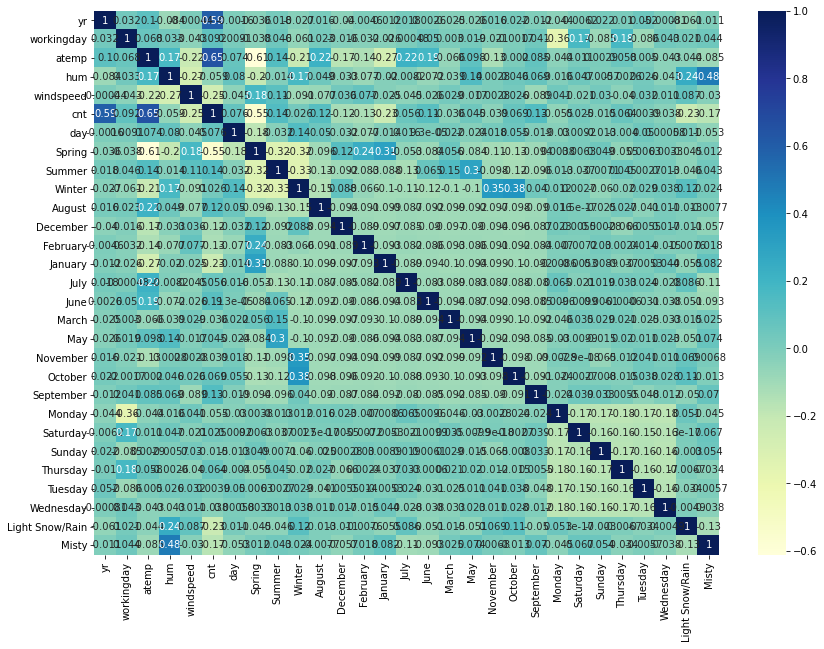

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Building Model

In [40]:
y_train= df_train.pop('cnt')
X_train=df_train

In [41]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 14),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 11),
 ('December', False, 3),
 ('February', False, 5),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 4),
 ('March', False, 8),
 ('May', False, 13),
 ('November', True, 1),
 ('October', False, 9),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 6),
 ('Sunday', False, 10),
 ('Thursday', False, 12),
 ('Tuesday', False, 2),
 ('Wednesday', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Misty', True, 1)]

In [43]:
col= X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['day', 'August', 'December', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday'],
      dtype='object')

In [45]:
X_train_rfe= X_train[col]

In [46]:
X_train_rfe= sm.add_constant(X_train_rfe)

In [47]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.82e-180
Time:                        18:29:23   Log-Likelihood:                 494.24
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     494   BIC:                            -888.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3066      0.036     

### Manual fine tuning using statsmodel

In [49]:
X_train_new= X_train_rfe.drop(['January'], axis=1) #Dropping high p value variable

In [50]:
X_train_lm= sm.add_constant(X_train_new)
lm= sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 18 May 2022   Prob (F-statistic):          4.85e-181
Time:                        18:29:23   Log-Likelihood:                 492.91
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2985      0.036     

In [52]:
#Dropping high p value variable and rebuilding model
X_train_new= X_train_new.drop(['November'], axis=1)
X_train_lm= sm.add_constant(X_train_new)
lm= sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.10e-181
Time:                        18:30:29   Log-Likelihood:                 491.72
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2926      0.036     

In [53]:
#Dropping high p value variable and rebuilding model
X_train_new= X_train_new.drop(['Wednesday'], axis=1)
X_train_lm= sm.add_constant(X_train_new)
lm= sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 18 May 2022   Prob (F-statistic):          3.67e-182
Time:                        18:30:51   Log-Likelihood:                 490.09
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     497   BIC:                            -899.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2887      0.036     

### Checking VIF

In [56]:
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,73.17
6,Spring,4.23
3,atemp,3.26
8,Winter,2.86
7,Summer,2.05
4,hum,1.87
12,Misty,1.56
11,Light Snow/Rain,1.26
5,windspeed,1.20
9,July,1.13


All values are within 5 which is the acceptable range. We can now proceed with prediction

## Prediction and Evaluation of Train Set

In [59]:
#prediction
y_train_pred= lm.predict(X_train_new)

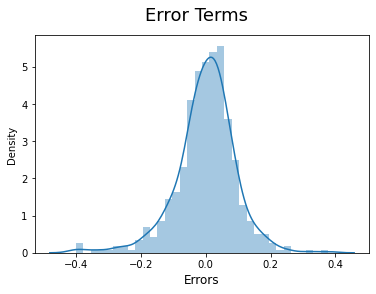

In [68]:
#Residual Analysis
res= y_train - y_train_pred
fig=plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize= 18)
plt.xlabel('Errors', fontsize=12)
plt.show()

## Predictions on test data

In [73]:
num_vars

['atemp', 'hum', 'windspeed', 'cnt']

In [74]:
#Applying scaling on test set
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [75]:
#Dividing into X_test and y_test
y_test=df_test.pop('cnt')
X_test=df_test

In [83]:
X_train_new= X_train_new.drop(['const'], axis=1)

In [84]:
#creating X_test_new with only predictor variables
X_test_new= X_test[X_train_new.columns]

In [85]:
#Adding constant
X_test_new=sm.add_constant(X_test_new)

In [86]:
#Making predictions
y_pred= lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

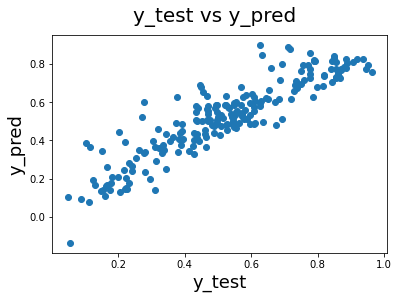

In [87]:
fig= plt.figure()
plt.scatter(y_test,y_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

In [88]:
#Comparing r2 score

r2_score(y_true=y_test, y_pred=y_pred)

0.8123680335580792

### The R2 score of the predicted test data is found to be similar to our train data R2 score. Hence the model has been evaluated successfully

## Final Model

### Count= 0.2323*year +0.0214*workingday + 0.5054*atemp -0.1441*hum -0.1591*windspeed -0.0909* Spring + 0.0310*summer +0.0661* winter -0.0376*July +0.0623*September -0.02239*Light Rain/snow -0.0559*misty